<a href="https://colab.research.google.com/github/mariemsmaoui/data_science/blob/ds/datapreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =pd.read_csv("/content/sample_data/Data.csv")

In [ ]:
data.head(10)


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,NaN,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
data.shape


(10, 4)

In [ ]:
#affichage des dimensions
print("Nombre de ligne: ", data.shape[0], " Nombre de colonne: ",data.shape[1])


Nombre de ligne:  10  Nombre de colonne:  4


In [ ]:
#affichage des noms des colonnes de la dataset
for column in data.columns:
    print(column, end='-')
print()

Country-Age-Salary-Purchased-


In [ ]:
#Extraction des descripteurs dans une DataFrame
data_x = data.iloc[:,:-1]
print(data_x)

   Country   Age   Salary
0   France  44.0  72000.0
1      NaN  27.0  48000.0
2  Germany  30.0  54000.0
3    Spain  38.0  61000.0
4  Germany  40.0      NaN
5   France  35.0  58000.0
6    Spain   NaN  52000.0
7   France  48.0  79000.0
8  Germany  50.0  83000.0
9   France  37.0  67000.0


False


In [ ]:
#Extraction des labels dans une DataFrame
data_y = data.iloc[:,3:4]
print(data_y)

  Purchased
0        No
1       Yes
2        No
3        No
4       Yes
5       Yes
6        No
7       Yes
8        No
9       Yes


In [ ]:
#Affichage
print("Les descripteurs: ", data_x)
print("Les labels: ", data_y)
print("Les dimensions des descripteurs: ", data_x.shape)
print("Les dimensions des labels: ", data_y.shape)

Les descripteurs:     Country   Age   Salary
0   France  44.0  72000.0
1      NaN  27.0  48000.0
2  Germany  30.0  54000.0
3    Spain  38.0  61000.0
4  Germany  40.0      NaN
5   France  35.0  58000.0
6    Spain   NaN  52000.0
7   France  48.0  79000.0
8  Germany  50.0  83000.0
9   France  37.0  67000.0
Les labels:    Purchased
0        No
1       Yes
2        No
3        No
4       Yes
5       Yes
6        No
7       Yes
8        No
9       Yes
Les dimensions des descripteurs:  (10, 3)
Les dimensions des labels:  (10, 1)


In [ ]:
print(data_x.isnull())


   Country    Age  Salary
0    False  False   False
1     True  False   False
2    False  False   False
3    False  False   False
4    False  False    True
5    False  False   False
6    False   True   False
7    False  False   False
8    False  False   False
9    False  False   False


(array([1., 1., 0., 1., 2., 1., 0., 1., 0., 2.]),
 array([27. , 29.3, 31.6, 33.9, 36.2, 38.5, 40.8, 43.1, 45.4, 47.7, 50. ]),
 <BarContainer object of 10 artists>)

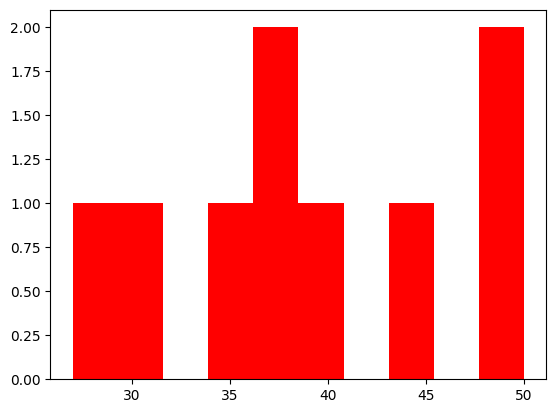

In [ ]:
#1 er technique POUR VERIFIER SI GAUSSIAN  :histogramme
plt.hist(data_x['Age'],color='red')

In [ ]:
plt.show()


In [ ]:
# generate descriptive statistics of a DataFrame
data_x.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7e0740468a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7e0740468eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e0740468760>],
 'medians': [<matplotlib.lines.Line2D at 0x7e07404693f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e0740469690>],
 'means': []}

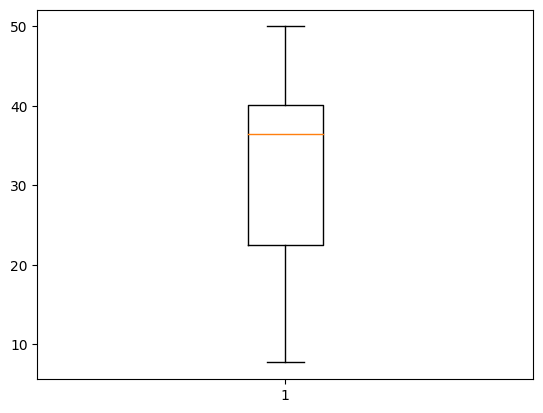

In [ ]:
#detetcter outlier
plt.boxplot(data_x['Age'].describe())

In [ ]:
#2eme technique :test statique
#probleme :!!base n'est pas grande
shapiro(data_x['Age'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [ ]:
#1.chercher nan (donner manquente)
#2.remplecer avec moy ou mediane
#3.tranformation
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(data_x.iloc[:,[1,2]])
data_x.iloc[:,[1,2]]=imputer.transform(data_x.iloc[:,[1,2]])
print(data_x)


   Country        Age        Salary
0   France  44.000000  72000.000000
1      NaN  27.000000  48000.000000
2  Germany  30.000000  54000.000000
3    Spain  38.000000  61000.000000
4  Germany  40.000000  63777.777778
5   France  35.000000  58000.000000
6    Spain  38.777778  52000.000000
7   France  48.000000  79000.000000
8  Germany  50.000000  83000.000000
9   France  37.000000  67000.000000


In [ ]:
#fill missing values
imputer1 = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer1.fit(data_x.iloc[:,[1,2]])
data_x.iloc[:,[1,2]]=imputer1.transform(data_x.iloc[:,[1,2]])
print(data_x)

   Country        Age        Salary
0   France  44.000000  72000.000000
1      NaN  27.000000  48000.000000
2  Germany  30.000000  54000.000000
3    Spain  38.000000  61000.000000
4  Germany  40.000000  63777.777778
5   France  35.000000  58000.000000
6    Spain  38.777778  52000.000000
7   France  48.000000  79000.000000
8  Germany  50.000000  83000.000000
9   France  37.000000  67000.000000


PART2

In [ ]:
#encoder y
encoder_y= LabelEncoder()
# transform  the values in data_y
data_y0=encoder_y.fit_transform(data_y)
data_y0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
#encoder x
#LabelEncoder instance
label=LabelEncoder()
# transform and replace the values
data_x.iloc[:,0]=label.fit_transform(data_x.iloc[:,0])
data_x

<ipython-input-64-dc60b1a7ec17>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_x.iloc[:,0]=label.fit_transform(data_x.iloc[:,0])


,Country,Age,Salary
0,0,44.000000,72000.000000
1,3,27.000000,48000.000000
2,1,30.000000,54000.000000
3,2,38.000000,61000.000000
4,1,40.000000,63777.777778
5,0,35.000000,58000.000000
6,2,38.777778,52000.000000
7,0,48.000000,79000.000000
8,1,50.000000,83000.000000
9,0,37.000000,67000.000000


In [ ]:
 #Encode the first column  with OneHotEncoder
ct = ColumnTransformer([("Country",OneHotEncoder(),[0])],remainder='passthrough')
data_x=ct.fit_transform(data_x)
print(data_x)

In [ ]:
data_x=data_x[:,1:]
data_x

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [ ]:
# Split the data for test  and train : ! proportion test
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.2,random_state=0)#random state to get the same split every time.
x_train
x_test
y_train
y_test

,Purchased
2,No
8,No


No charts were generated by quickchart


In [ ]:
#standarisation = detect outliers
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train



array([[ 2.64575131, -0.57735027, -0.37796447,  0.26306757,  0.12381479],
       [-0.37796447, -0.57735027, -0.37796447, -0.25350148,  0.46175632],
       [-0.37796447, -0.57735027,  2.64575131, -1.97539832, -1.53093341],
       [-0.37796447,  1.73205081, -0.37796447,  0.05261351, -1.11141978],
       [-0.37796447, -0.57735027, -0.37796447,  1.64058505,  1.7202972 ],
       [-0.37796447,  1.73205081, -0.37796447, -0.0813118 , -0.16751412],
       [-0.37796447, -0.57735027, -0.37796447,  0.95182631,  0.98614835],
       [-0.37796447, -0.57735027, -0.37796447, -0.59788085, -0.48214934]])

In [ ]:
#test

x_test=scaler.transform(x_test)
x_test


array([[1.00000000e+00, 2.77555756e-17, 1.38777878e-17, 3.00000000e+01,
        5.40000000e+04],
       [1.00000000e+00, 2.77555756e-17, 1.38777878e-17, 5.00000000e+01,
        8.30000000e+04]])

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@dc351bc0e5ea.(none)')
